In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import kagglehub
import os
import random
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
#Set the path to the dataset available in Kaggle
path = kagglehub.dataset_download("gauravduttakiit/resume-dataset")
print(path)

/root/.cache/kagglehub/datasets/gauravduttakiit/resume-dataset/versions/1


In [34]:
#Getting the contents present in the 'path'
data = os.listdir(path)
data

['UpdatedResumeDataSet.csv']

In [35]:
#joining the dataset to the path
for d in data:
  filepath = os.path.join(path, d)
  print(filepath)

/root/.cache/kagglehub/datasets/gauravduttakiit/resume-dataset/versions/1/UpdatedResumeDataSet.csv


In [36]:
df = pd.read_csv(filepath)
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [37]:
df.shape

(962, 2)

In [38]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


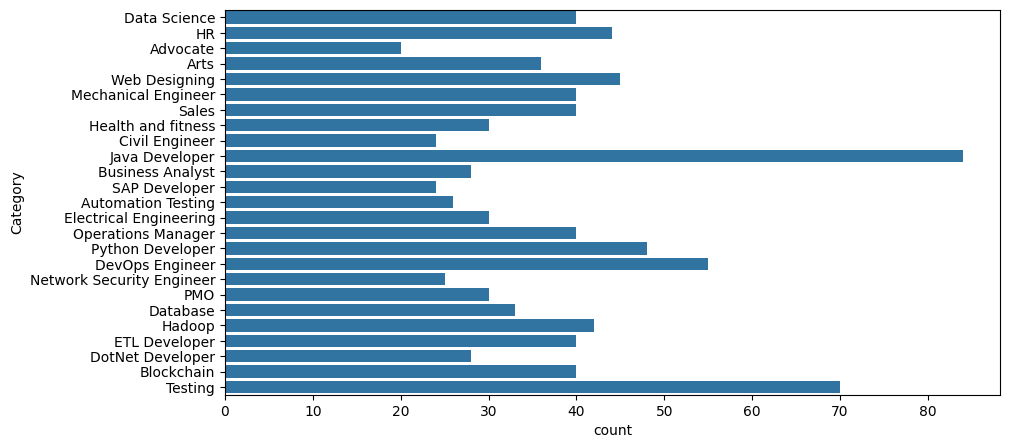

In [39]:
#printing the graphical representation on number of categories
plt.figure(figsize=(10, 5))
sns.countplot(df['Category'])
plt.show()

In [40]:
# printing random resume and its category
rand = random.randint(0, df.shape[0])
print(df['Category'][rand])
print()
print(df['Resume'][rand])

HR

Computer Knowledge: â¢ Proficient in basic use of MS office â¢ Microsoft Dynamics AX software â¢ SAIBA softwareEducation Details 
 MBA   Distance education Bharathiar University
 BE   PA College of Engineering and Technology
 HSC   R.V.G. Hr Sec School
 SSC   G.Hr.Sec School
HR 

Admin in Bharat
Skill Details 
DYNAMICS- Exprience - 6 months
DYNAMICS AX- Exprience - 6 months
MICROSOFT DYNAMICS- Exprience - 6 months
MICROSOFT DYNAMICS AX- Exprience - 6 months
MS OFFICE- Exprience - 6 monthsCompany Details 
company - Sri Ramesh Gaarment
description - Tirupur

Administration as well as clients service
Here corporate companies only insured so that knowledge gathered about
Garments, spinning mills

â¢ FEB 2018 to Still: Sri Ramesh Gaarment Tirupur.

HR Activities
Attendance maintenance, Time cards maintenance,
Staffs and labors individual records maintenance

Project:
â¢ Advanced automobile collision avoidance and blackbox in CAR


In [41]:
# cleaning the text using regex library
def clean(text):
  cleanText = re.sub('http\S+\s','',text) #removes http links
  cleanText = re.sub('@\S+','',cleanText) #removes strings containing '@'
  cleanText = re.sub('#\S+\s','',cleanText) #removes strings containing '#'
  cleanText = re.sub('RT|cc','',cleanText) #removes any mentions
  cleanText = re.sub(r'[^\x00-\x7f]','',cleanText) #removes emojies and any foreign letters
  cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),'',cleanText) #removes all special characters
  return cleanText

In [42]:
df['Resume']

,Resume
0,Skills * Programming Languages: Python (pandas...
1,Education Details \r\nMay 2013 to May 2017 B.E...
2,"Areas of Interest Deep Learning, Control Syste..."
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...
957,Computer Skills: â¢ Proficient in MS office (...
958,â Willingness to accept the challenges. â ...
959,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [43]:
#applying clean function to resume column
df['Resume'] = df['Resume'].apply(lambda x: clean(x))
df['Resume']

,Resume
0,Skills Programming Languages Python pandas nu...
1,Education Details \r\nMay 2013 to May 2017 BE ...
2,Areas of Interest Deep Learning Control System...
3,Skills R Python SAP HANA Tableau SAP HANA...
4,Education Details \r\n MCA YMCAUST Faridaba...
...,...
957,Computer Skills Proficient in MS office Word ...
958,Willingness to aept the challenges Positive ...
959,PERSONAL SKILLS Quick learner Eagerness to l...
960,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Po...


In [44]:
#converting Category column from strings to numerical categories
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
df['Category']

,Category
0,6
1,6
2,6
3,6
4,6
...,...
957,23
958,23
959,23
960,23


In [45]:
#Converting Resume from string to numeric vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
df_tfidf = tfidf.transform(df['Resume'])

In [46]:
print(df_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164388 stored elements and shape (962, 7908)>
  Coords	Values
  (0, 168)	0.06809793637972014
  (0, 393)	0.03069004555135645
  (0, 427)	0.046226256995428254
  (0, 457)	0.029224751269130676
  (0, 473)	0.046226256995428254
  (0, 619)	0.1401646217860387
  (0, 622)	0.07834217048728302
  (0, 625)	0.15621969996018062
  (0, 630)	0.020918653464961592
  (0, 639)	0.02613313646739713
  (0, 650)	0.046226256995428254
  (0, 654)	0.03719031514392792
  (0, 679)	0.031059305499386895
  (0, 790)	0.046226256995428254
  (0, 819)	0.0808091116532307
  (0, 821)	0.028935158853504495
  (0, 822)	0.07622895450234725
  (0, 823)	0.06754892058778687
  (0, 829)	0.10689024184745234
  (0, 892)	0.027402020356246257
  (0, 895)	0.034958375924945405
  (0, 989)	0.0154954398652322
  (0, 1002)	0.0808091116532307
  (0, 1037)	0.023960572204604787
  (0, 1092)	0.046226256995428254
  :	:
  (961, 6270)	0.05428391316017073
  (961, 6360)	0.039638920751405404
  (961, 6421)	0

In [47]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(df_tfidf, df['Category'], test_size=0.2, random_state=42)

In [48]:
x_train.shape

(769, 7908)

In [49]:
x_test.shape

(193, 7908)

In [50]:
#Building a KNN model
knn_model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_model.fit(x_train, y_train)


OneVsRestClassifier(estimator=KNeighborsClassifier())

In [51]:
#Predicting the knn model on x_test
y_pred = knn_model.predict(x_test)
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [52]:
#Evaluating the model's performance
print(accuracy_score(y_test, y_pred))

0.9844559585492227
